# Importing Libraries

In [1]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install soundfile


In [2]:
import os
from tqdm import tqdm


from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

!pip install audiomentations
!pip install resampy

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

from scipy.io import wavfile as wav

import IPython.display as ipd
import librosa
import librosa.display

import tensorflow as tf
import tensorflow_hub as hub
# import tensorflow_io as tfio

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter


from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 , sample_rate1 = librosa.load('/content/drive/MyDrive/ML_GaganSir/ML_Project/datasets/ESC-50-master/audio/1-100032-A-0.wav')

In [5]:
sample_rate1

22050

In [7]:
display.Audio(data1, rate=16000)


# The Implementation Begins

### Data Preprocessing
### We are using ESC-50 dataset


In [8]:
esc50_path = "/content/drive/MyDrive/ML_GaganSir/ML_Project/datasets/ESC-50-master/meta/esc50.csv"
audio_file_path = "/content/drive/MyDrive/ML_GaganSir/ML_Project/datasets/ESC-50-master/audio/"


In [9]:
df = pd.read_csv(esc50_path)
df.head(5)

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [10]:
df['category'].value_counts()

dog                 40
glass_breaking      40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
snoring             40
chirping_birds      40
toilet_flush        40
pig                 40
washing_machine     40
clock_tick          40
sneezing            40
rooster             40
sea_waves           40
siren               40
cat                 40
door_wood_creaks    40
helicopter          40
crackling_fire      40
car_horn            40
brushing_teeth      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm

In [11]:
my_classes = ['dog', 'cat']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

filtered_df = df[df.category.isin(my_classes)]

In [12]:
#Contains only cats and dogs audio
filtered_df

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
14,1-110389-A-0.wav,1,0,dog,True,110389,A
157,1-30226-A-0.wav,1,0,dog,True,30226,A
158,1-30344-A-0.wav,1,0,dog,True,30344,A
170,1-32318-A-0.wav,1,0,dog,True,32318,A
...,...,...,...,...,...,...,...
1832,5-217158-A-0.wav,5,0,dog,True,217158,A
1871,5-231762-A-0.wav,5,0,dog,True,231762,A
1968,5-256452-A-5.wav,5,5,cat,False,256452,A
1973,5-259169-A-5.wav,5,5,cat,False,259169,A


In [13]:
filtered_df['target'] = label_encoder.fit_transform(filtered_df['category'])

filtered_df['filename'] = filtered_df['filename'].apply(lambda row: os.path.join(audio_file_path, row))

filtered_df.head(10)

<ipython-input-13-198019d0f40b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['target'] = label_encoder.fit_transform(filtered_df['category'])
<ipython-input-13-198019d0f40b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['filename'] = filtered_df['filename'].apply(lambda row: os.path.join(audio_file_path, row))


,filename,fold,target,category,esc10,src_file,take
0,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,1,dog,True,100032,A
14,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,1,dog,True,110389,A
157,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,1,dog,True,30226,A
158,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,1,dog,True,30344,A
170,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,1,dog,True,32318,A
175,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,0,cat,False,34094,A
176,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,0,cat,False,34094,B
229,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,0,cat,False,47819,A
230,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,0,cat,False,47819,B
231,/content/drive/MyDrive/ML_GaganSir/ML_Project/...,1,0,cat,False,47819,C


In [14]:
filtered_df.shape

(80, 7)

In [15]:
# Create a stratified split for the original DataFrame
train_data, val_test_data = train_test_split(filtered_df, test_size=0.3, random_state=42, stratify=filtered_df['category'])
val_data, test_data = train_test_split(val_test_data, test_size=2/3, random_state=42)


In [16]:
print(f"train data {train_data.shape} \n valiadtion data {val_data.shape} \n test_data {test_data.shape}")

train data (56, 7) 
 valiadtion data (8, 7) 
 test_data (16, 7)


### Using MFCC to extract important features

### Applying Augmentations

In [17]:
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter , TimeStretch

augment_raw_audio = Compose([
    AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1),
    PitchShift(min_semitones=-8, max_semitones=8, p=1),
    HighPassFilter(min_cutoff_freq=2000, max_cutoff_freq=4000, p=1),
    TimeStretch(p=0.5),


])


In [18]:
# Function to extract features from an audio file

def extract_and_augment_features(file_name, category, augmentation=None):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

    if augmentation:
        aug_audio = augmentation(audio, sample_rate=sample_rate)
        audio = np.append(audio, aug_audio)

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features, category

In [19]:



def datasets(dataframe, augmentation=None, train=False):
    features_list = []
    categories_list = []

    for index, row in dataframe.iterrows():
        file_name = row['filename']
        category = row['category']
        if train:
          features, cat = extract_and_augment_features(file_name, category, None)
          features_list.append(features)
          categories_list.append(cat)

        # Extract and augment features
        features, cat = extract_and_augment_features(file_name, category, augmentation)

        # Append to lists
        features_list.append(features)
        categories_list.append(cat)

    return features_list, categories_list


In [20]:
train_features_list, train_categories_list = datasets(train_data,augment_raw_audio, train=True)

In [21]:
labelencoder=LabelEncoder()
train_categories_list = to_categorical(labelencoder.fit_transform(train_categories_list))

In [22]:
#train_categories_list

In [23]:
np.array(train_features_list).shape

(112, 40)

In [24]:
valid_features_list, valid_categories_list = datasets(val_data,None)

In [25]:
#I didn't execute
labelencoder=LabelEncoder()
valid_categories_list = to_categorical(labelencoder.fit_transform(valid_categories_list))

In [26]:
np.array(valid_features_list).shape

(8, 40)

In [27]:
test_features_list, test_categories_list = datasets(test_data,None)

In [28]:
labelencoder=LabelEncoder()
test_categories_list = to_categorical(labelencoder.fit_transform(test_categories_list))
test_categories_list

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [29]:
np.array(test_features_list).shape

(16, 40)

In [30]:
num_labels = np.array(train_categories_list).shape[1]
num_labels

2

In [31]:
len(train_features_list)

112

In [32]:
# # Convert your X and y lists of arrays to numpy arrays
X_train = np.array(train_features_list)
y_train = np.array(train_categories_list)
X_val = np.array(valid_features_list)
y_val = np.array(valid_categories_list)
X_test = np.array(test_features_list)
y_test = np.array(test_categories_list)

In [33]:
# from IPython.core.interactiveshell import validate
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models





# # Compile the model
# model.compile(optimizer='adam',  # You can choose another optimizer if needed
#               loss='categorical_crossentropy',  # Adjust the loss function for your task
#               metrics=['accuracy'])

# # Print the model summary
# model.summary()

# # Assuming you have one-hot encoded your target labels if it's a classification task
# # If not, use suitable encoding for your task

# # Split your data into training and testing sets (you can use X_train and y_train)
# # from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Train the model


# history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_val, y_val))

# # # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



### Fully Connected Network

In [34]:
# Define the neural network model
model = models.Sequential()

model.add(layers.Flatten(input_shape=(40,)))  # Assuming each input has 40 features

model.add(layers.Dense(32, activation='relu'))


model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

# Dropout layer

model.add(layers.Dense(32, activation='relu'))


# Add the output layer with appropriate activation (e.g., 'softmax' for classification)
model.add(layers.Dense(2, activation='softmax'))  # Replace num_classes with the number of output classes


In [35]:
from IPython.core.interactiveshell import validate
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.optimizers import SGD
from time import time

custom_learning_rate = 0.001  # You can adjust this value

# Create an Adam optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)
# custom_optimizer = SGD(learning_rate=custom_learning_rate, momentum=0.9)  # You can adjust the momentum value


# Compile the model
model.compile(optimizer=custom_optimizer,  # You can choose another optimizer if needed
              loss='categorical_crossentropy',  # Adjust the loss function for your task
              metrics=['accuracy'])

# Print the model summary
model.summary()



start_time = time()
history = model.fit(X_train, y_train, epochs=40, batch_size=28, validation_data=(X_val, y_val))
end_time = time()
# Calculate the total training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds\n")


# # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 32)                1312      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 15938 (62.26 KB)
Trainable params: 15938 (

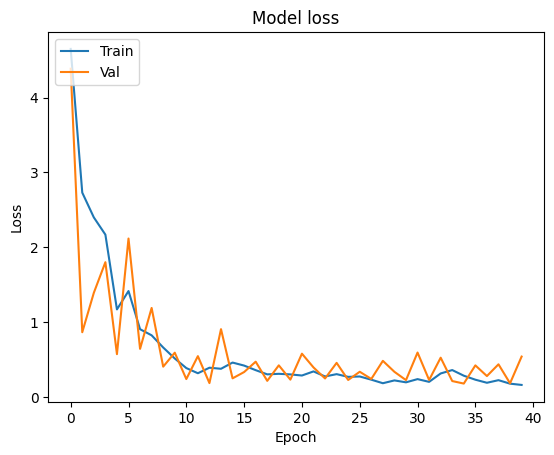

In [36]:
# plotting training history over epochs using matplotlib

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [37]:
####WAVENET

### RNN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 52066 (203.38 KB)
Trainable params: 52066 (203.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
4/4 [==============================] - 7s 500ms/step - loss: 0.6892 - accuracy: 0.4911 - val_loss: 0.6721 - val_accuracy: 0.3750
Epoch 2/

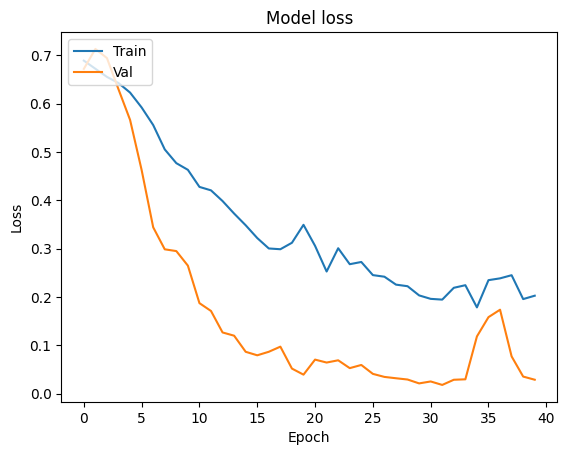

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM RNN model
rnn_model = Sequential()

# LSTM layers for the RNN architecture
rnn_model.add(LSTM(64, activation='tanh', input_shape=(40, 1), return_sequences=True))
rnn_model.add(LSTM(64, activation='tanh', return_sequences=False))

# Add fully connected layers
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(2, activation='softmax'))  # Replace 2 with the number of output classes

# Compile the RNN model with appropriate settings
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()



start_time = time()
history = rnn_model.fit(X_train, y_train, epochs=40, batch_size=28, validation_data=(X_val, y_val))

end_time = time()
# Calculate the total training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds\n")

# # Evaluate the model on the test set
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")# plotting training history over epochs using matplotlib

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## In this project, Aditya built RNN, ANN and tried out different architectures.


## In this Project, Aritra set the data pipeline, processing, applied MFCC and Augmentations

#**But as we mentioned earlier we both were heavily involved in the whole process.**





<ipython-input-118-9712b5479b93>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['audio_data'] = filtered_df['filename'].apply(load_and_preprocess_audio)
<ipython-input-118-9712b5479b93>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['yamnet_embedding'] = filtered_df['audio_data'].apply(extract_yamnet_embedding)


Epoch 1/10
2/2 [==============================] - 2s 424ms/step - loss: 0.7997 - accuracy: 0.5625 - val_loss: 1.7028 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 43ms/step - loss: 0.5379 - accuracy: 0.7344 - val_loss: 2.3042 - val_accuracy: 0.8125
Epoch 3/10
2/2 [==============================] - 0s 69ms/step - loss: 0.4269 - accuracy: 0.8594 - val_loss: 2.6696 - val_accuracy: 0.8750
Epoch 4/10
2/2 [==============================] - 0s 56ms/step - loss: 0.3982 - accuracy: 0.8438 - val_loss: 2.9609 - val_accuracy: 0.8125
Epoch 5/10
2/2 [==============================] - 0s 40ms/step - loss: 0.3036 - accuracy: 0.8750 - val_loss: 3.2713 - val_accuracy: 0.8750
Epoch 6/10
2/2 [==============================] - 0s 40ms/step - loss: 0.2653 - accuracy: 0.9219 - val_loss: 3.5789 - val_accuracy: 0.8750
Epoch 7/10
2/2 [==============================] - 0s 44ms/step - loss: 0.2259 - accuracy: 0.9531 - val_loss: 3.8964 - val_accuracy: 0.8125
Epoch 8/10
2/2 [==========

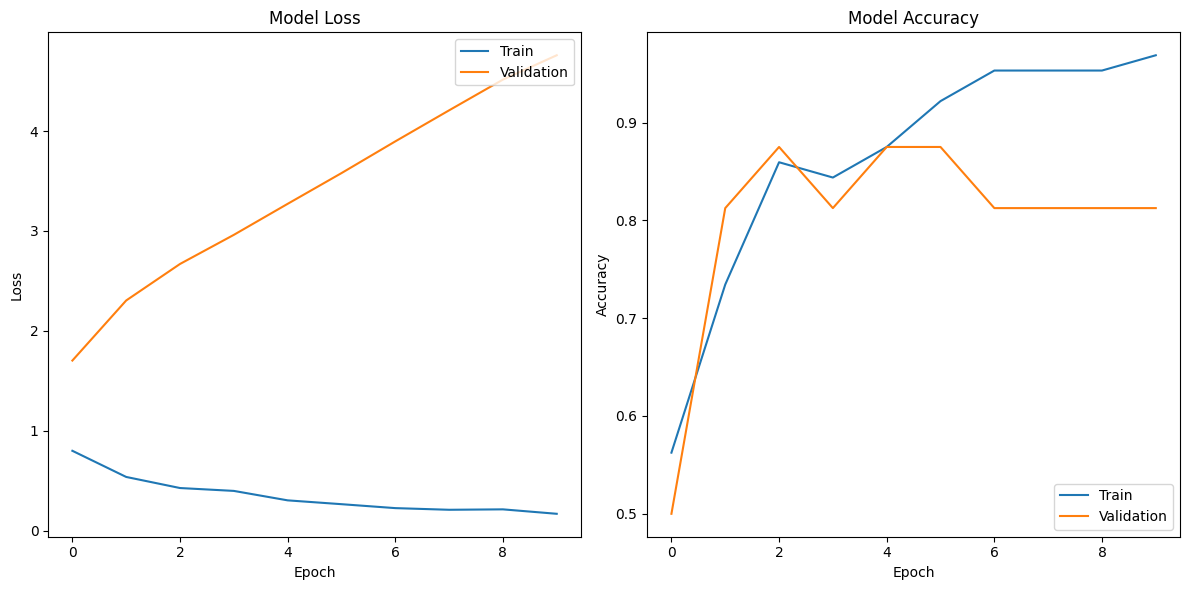

1/1 [==============================] - 0s 142ms/step
Classification Report:
               precision    recall  f1-score   support

         dog       0.86      0.75      0.80         8
         cat       0.78      0.88      0.82         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16

Confusion Matrix:
 [[6 2]
 [1 7]]


In [118]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tensorflow_hub as hub


# Function to load and preprocess audio data
def load_and_preprocess_audio(file_path):
    audio = tf.io.read_file(file_path)
    audio, _ = tf.audio.decode_wav(audio, 1, 16000)
    audio = tf.squeeze(audio, axis=-1)
    return audio

# Function to extract YAMNet embeddings
def extract_yamnet_embedding(audio_data):
    scores, embeddings, spectrogram = yamnet_model(audio_data)
    return embeddings

# Apply the functions to the dataset
filtered_df['audio_data'] = filtered_df['filename'].apply(load_and_preprocess_audio)
filtered_df['yamnet_embedding'] = filtered_df['audio_data'].apply(extract_yamnet_embedding)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    np.array(filtered_df['yamnet_embedding'].tolist()),
    filtered_df['target'],
    test_size=0.2,
    random_state=42
)

# Build a simple neural network for classification
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None, 1024), dtype=tf.float32),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(my_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

# Make predictions on the validation set
y_val_pred = np.argmax(model.predict(X_val), axis=1)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_val_pred, target_names=my_classes))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))